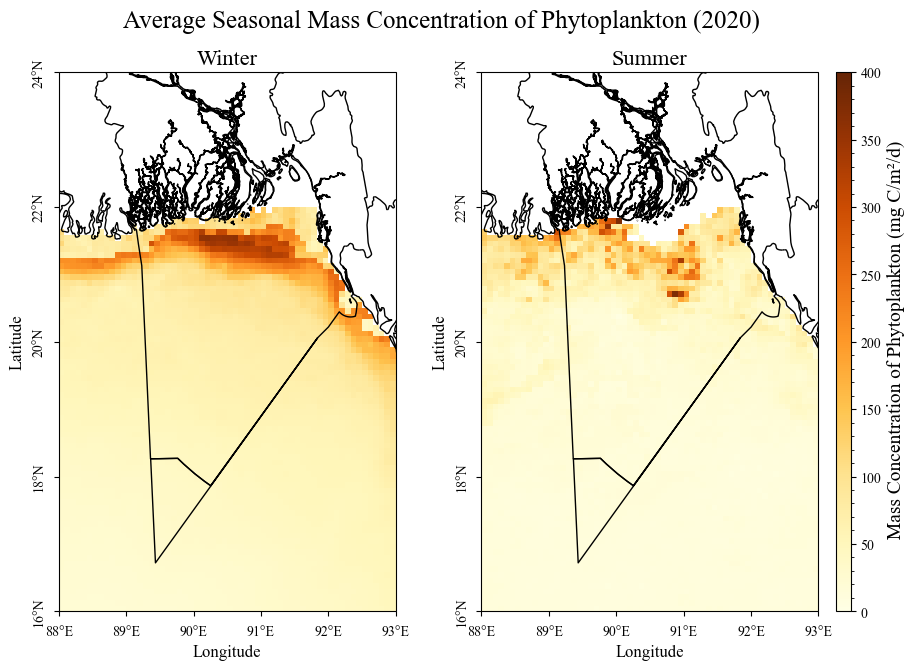

In [6]:
import xarray as xr
import rioxarray
import numpy as np
import netCDF4
import os
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mpl_colors
import math
import geopandas as gpd

combined_sesason_ds = xr.open_dataset(r"E:\Script\MSP_Data_office_PC\Output\Phytoplankton\Seasonal_Sea_Surface_Phytoplankton_Combined_2020.nc")
gdf = gpd.read_file(r"E:\Script\MSP_Data_office_PC\Shape_File\Exclusive_Economic_Zone_and_Maritime_Boundary.shp")

# Determining overall color range based on the data
overall_vmin = 0      # math.ceil(np.min(data.variables['to'][:,0,:,:]))
overall_vmax = 400      # math.floor(np.min(data.variables['to'][:,0,:,:]))

# Creating a common colormap
cmap = plt.get_cmap('YlOrBr')

latitude = combined_sesason_ds['lat'].data
longitude = combined_sesason_ds['lon'].data
season = combined_sesason_ds['season'].data
sea_water_temp = combined_sesason_ds['C_phyto'][:]

lon, lat = np.meshgrid(longitude, latitude)


font = {'family' : 'Times New Roman',              
        'weight' : 'normal',  
        'size'   : 10}

plt.rc('font',**font)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

fig, ax = plt.subplots(ncols = 2, figsize=(10,7), subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(0, len(season)):
    
    extent = (88, 93, 16, 23.875)
    ax[i].set_extent(extent, ccrs.PlateCarree())

    mp = ax[i].pcolormesh(lon, lat, np.squeeze(sea_water_temp[i, :, :]), cmap=cmap, 
                             norm=mpl_colors.Normalize(vmin=overall_vmin, vmax=overall_vmax))

    ax[i].add_feature(cfeature.COASTLINE)
    ax[i].add_feature(cfeature.BORDERS)

    color_dict = {'facecolor': 'none', 'edgecolor': 'black'}

    for row in gdf.iterrows():
        geom = gpd.GeoSeries(row[1].geometry)
        ax[i].add_geometries(geom, ccrs.PlateCarree(), **color_dict)
        
    xticks = np.arange(88, 94, 1)
    ax[i].set_xticks(xticks)
    ax[i].tick_params(axis='x', pad =6)
    ax[i].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0E"))

    yticks = np.arange(16, 25, 2)
    ax[i].set_yticks(yticks)
    ax[i].tick_params(axis='y', labelrotation=90, pad =6)
    ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0N"))

    ax[i].set_xlabel('Longitude', fontsize=12)
    ax[i].set_ylabel('Latitude', fontsize=12)

    plt.setp(ax[i].get_yticklabels(), va='center')
    plt.setp(ax[i].get_xticklabels(), ha='center')
    
    ax[i].set_title('{}'.format(season[i]), fontsize=16)

# [left, bottom, width, height] 
cbar_ax = fig.add_axes([0.91, 0.11, 0.015, 0.77]) 
fig.colorbar(mp, cax=cbar_ax, cmap=cmap, orientation='vertical', pad=0.02, shrink=5.5,
                 norm=mpl_colors.Normalize(vmin=overall_vmin, vmax=overall_vmax))
# cbar_ax.invert_yaxis()
cbar_ax.minorticks_on()
cbar_ax.set_ylabel(' Mass Concentration of Phytoplankton (mg C/m\u00b2/d)', fontsize = 14)

fig.suptitle('Average Seasonal Mass Concentration of Phytoplankton (2020)', fontsize=18, x=0.515, y = 0.97)
# plt.savefig(r'G:\MJI\SKZ\Script\MSP_Data\Output\Seasonal\SeaTemp_Copernicus\Seasonal_Sea_Water_Temperature_2022.jpg',
#             dpi=300, bbox_inches = 'tight')

plt.show()